In [2]:
import statistics
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
file_input = open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_user_pref\8000_train_steps\inputs-8000-.dev.txt',
                        'r', encoding="mbcs")
file_pred = open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_user_pref\8000_train_steps\predictions-8000-.dev.txt',
                         'r', encoding="mbcs")

inputs = file_input.readlines()
pred   = file_pred.readlines()

file_input.close()
file_pred.close()

In [5]:
inputs[0]

'-----:0\n'

In [6]:
text_in = []
for line in inputs:
    if line[0] != '-' and line[0] != '[':
        line = line.strip('\n')
        text_in.append(line)

In [7]:
text_in[0]

"Long. A butcher whose countryside estate began running short of rabbits started selling squirrel - and the meat has proved so popular it sold out in three hours. Elveden Estate butchers in Suffolk is restricted to the numbers of rabbits it can shoot every month due to plummeting numbers and added the unusual delicacy to its menu in a bid to replace stocks. The free range squirrel is white in texture and is said to have a similar taste to rabbit while being low in fat. Elveden Estate butchers in Suffolk have added squirrel to their menu after their levels of rabbit starting running low. The unusual delicacy became so popular with customers it sold out in three hours . James Holliday, forestry and conservation manager at the estate, said: 'Rabbits are no longer breeding 'like rabbits'. 'Nationally, numbers have been in decline over the past few years and have now reached such low numbers we are limiting the number killed in order to maintain a sustainable population. 'The population had

In [8]:
summaries = []
for line in pred:
    if line[0] != '-':
        line = line.strip('\n')
        summaries.append(line)   

In [9]:
summaries[0]

'Elveden Estate butchers in Suffolk have added squirrel to their menu . The free range squirrel is white in texture and is said to have a similar taste to rabbit while being low in fat . The unusual delicacy became so popular with customers it sold out in three hours .'

In [10]:
df = pd.DataFrame({'text':text_in, 'summary':summaries})
df.head()

,text,summary
0,Long. A butcher whose countryside estate began...,Elveden Estate butchers in Suffolk have added ...
1,Short. Two drivers were injured when a massive...,15 of its 30 carriages derailed in the horrifi...
2,Long. GOP presidential candidates who flocked ...,"The Des Moines, Iowa, event was Bruce Rastette..."
3,Long. A man who found a travel partner after r...,"John Whitbread, 32, advertised on eBay after h..."
4,Long. 'Unacceptable': Lib Dem MP Jo Swinson ha...,Liberal Democrat MPs are pushing to bring into...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     200 non-null    object
 1   summary  200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [12]:
df['keyword']=df['text'].str.slice(0,5)
df['text_len']= [ len(x.split(' ')) for x in df['text']]
df['summ_len']= [ len(x.split(' ')) for x in df['summary']]

In [13]:
df[:30]

,text,summary,keyword,text_len,summ_len
0,Long. A butcher whose countryside estate began...,Elveden Estate butchers in Suffolk have added ...,Long.,304,51
1,Short. Two drivers were injured when a massive...,15 of its 30 carriages derailed in the horrifi...,Short,369,25
2,Long. GOP presidential candidates who flocked ...,"The Des Moines, Iowa, event was Bruce Rastette...",Long.,775,17
3,Long. A man who found a travel partner after r...,"John Whitbread, 32, advertised on eBay after h...",Long.,842,70
4,Long. 'Unacceptable': Lib Dem MP Jo Swinson ha...,Liberal Democrat MPs are pushing to bring into...,Long.,701,74
5,Long. From a makeshift office in a mobile home...,"Joanne Clayton sold data on 3,000 pensionersвЂ...",Long.,854,68
6,Short. Dundee United star Paul Paton has launc...,Dundee United star Paul Paton has launched an ...,Short,765,34
7,Long. Barcelona's players feature in a dramati...,"Lionel Messi, Luis Suarez and Neymar arrive al...",Long.,389,61
8,Long. A teenager took pictures of a schoolgirl...,The alleged victim had just turned 16 when she...,Long.,595,39
9,Long. If recent pictures are anything to go by...,Taylor Swift and Calvin Harris are set to beco...,Long.,872,14


In [14]:
df['keyword'].value_counts()

Long.    100
Short    100
Name: keyword, dtype: int64

(array([10., 14., 20., 12., 26., 16.,  2., 18., 22., 60.]),
 array([184. , 253.6, 323.2, 392.8, 462.4, 532. , 601.6, 671.2, 740.8,
        810.4, 880. ]),
 <BarContainer object of 10 artists>)

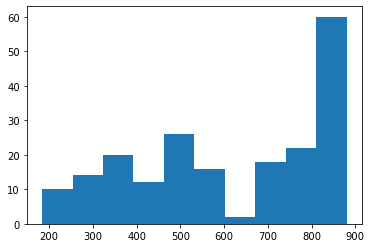

In [15]:
plt.hist(df['text_len'])

In [16]:
df.groupby(['keyword']).mean()['summ_len']

keyword
Long.    49.68
Short    35.35
Name: summ_len, dtype: float64

In [17]:
df_long  = df[df['keyword']=='Long.']
df_short = df[df['keyword']=='Short']

In [18]:
df_long['keyword'].value_counts()

Long.    100
Name: keyword, dtype: int64

In [19]:
df_short['keyword'].value_counts()

Short    100
Name: keyword, dtype: int64

In [20]:
df_long['summ_len'].mean()

49.68

In [21]:
df_short['summ_len'].mean()

35.35

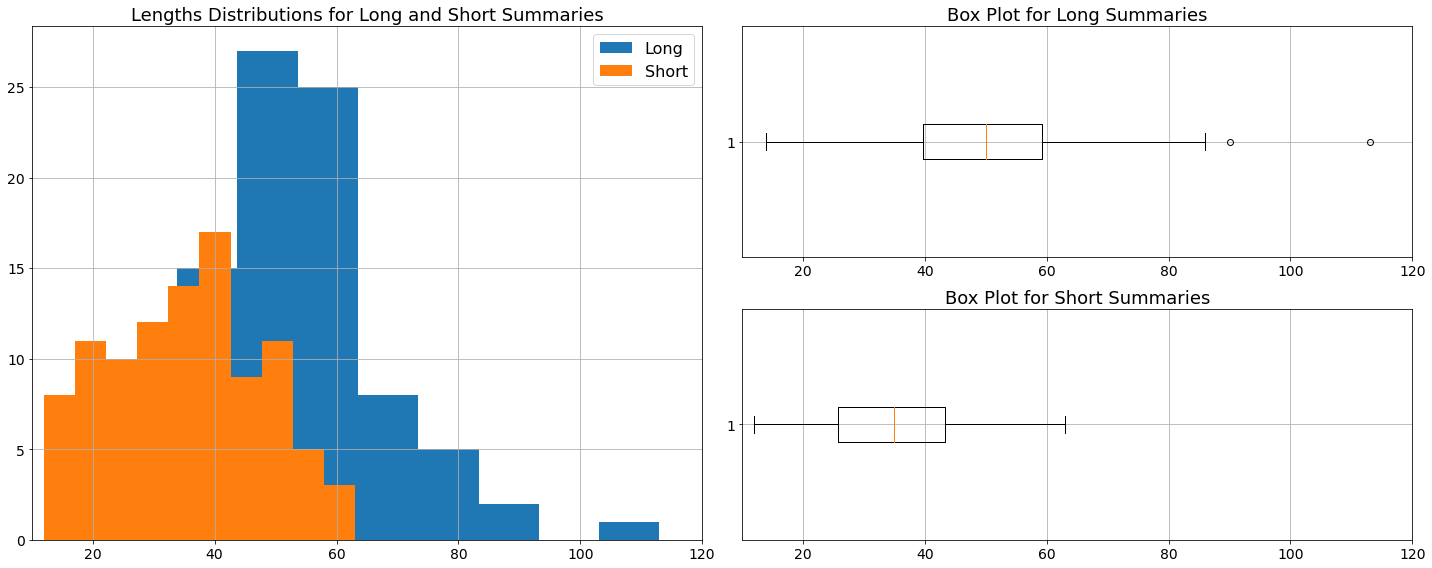

In [79]:
fig = plt.figure(figsize=(20,8))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])

ax1.grid()
ax2.grid()
ax3.grid()

ax1.hist(df_long['summ_len'], label='Long')
ax1.hist(df_short['summ_len'], label='Short')
ax1.set_title('Lengths Distributions for Long and Short Summaries',fontsize=18)
ax1.legend(fontsize=16)

ax2.boxplot(df_long['summ_len'], vert=False,)
ax2.set_title('Box Plot for Long Summaries',fontsize=18)

ax3.boxplot(df_short['summ_len'],vert=False,)
ax3.set_title('Box Plot for Short Summaries',fontsize=18)

for tick in ax1.xaxis.get_major_ticks(): tick.label.set_fontsize(14)
for tick in ax2.xaxis.get_major_ticks(): tick.label.set_fontsize(14) 
for tick in ax3.xaxis.get_major_ticks(): tick.label.set_fontsize(14)
    
for tick in ax1.yaxis.get_major_ticks(): tick.label.set_fontsize(14)
for tick in ax2.yaxis.get_major_ticks(): tick.label.set_fontsize(14) 
for tick in ax3.yaxis.get_major_ticks(): tick.label.set_fontsize(14) 

ax1.set_xlim(10,120)
ax2.set_xlim(10,120)
ax3.set_xlim(10,120)

plt.tight_layout()

In [24]:
from scipy import stats

In [25]:
stats.ttest_ind(df_long['summ_len'], df_short['summ_len'], equal_var=False)

Ttest_indResult(statistic=6.791259646834926, pvalue=1.5454691585841512e-10)

In [28]:
import seaborn as sbs